# PCA on IDS dataset

In [48]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# importing dataset
ids_dataset = pd.read_csv("IDS_merged_dataset.csv")
ids_dataset.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1300\1319772336.py:2: DtypeWarning: Columns (0,1,3,6,84) have mixed types. Specify dtype option on import or set low_memory=False.
  ids_dataset = pd.read_csv("IDS_merged_dataset.csv")


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80.0,192.168.10.5,49188.0,6.0,03/07/2017 08:55:58,4.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80.0,192.168.10.5,49188.0,6.0,03/07/2017 08:55:58,1.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80.0,192.168.10.5,49188.0,6.0,03/07/2017 08:55:58,1.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80.0,192.168.10.5,49188.0,6.0,03/07/2017 08:55:58,1.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.14-8.253.185.121-49486-80-6,8.253.185.121,80.0,192.168.10.14,49486.0,6.0,03/07/2017 08:56:22,3.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [3]:
# dataset information
# ids_dataset.info()

In [4]:
# Dataset columns
# ids_dataset.columns

In [5]:
# dropping unwanted columns
columns_to_be_dropped = [
    'Flow ID', 
    ' Source IP', 
    ' Source Port',
    ' Destination IP', 
    ' Destination Port', 
    ' Protocol', 
    ' Timestamp',
    ' Label'
]

pre_pca_ids_dataset = ids_dataset.drop(columns_to_be_dropped, axis=1)
pre_pca_ids_dataset.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,4.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# pre_pca_ids_dataset.info()

In [7]:
# 5 summary of dataset
# pre_pca_ids_dataset.describe()

In [8]:
# sns.heatmap(pre_pca_ids_dataset.isna())

In [9]:
pre_pca_ids_dataset.shape

(3119345, 77)

In [10]:
# Dropping missing values
pre_pca_ids_dataset.dropna(inplace=True)

In [11]:
pre_pca_ids_dataset.shape

(2829385, 77)

In [12]:
3119345 - 2829385

289960

In [13]:
# Converting infinity to nan
pre_pca_ids_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

In [14]:
# Dropping na
pre_pca_ids_dataset.dropna(inplace=True)

In [15]:
pre_pca_ids_dataset.shape

(2827876, 77)

In [16]:
2829385 - 2827876

1509

In [17]:
# Scaling dataset
scaler = StandardScaler()
scaled_pre_pca_dataset = scaler.fit_transform(pre_pca_ids_dataset)

In [18]:
pre_pca_ids_dataset.shape

(2827876, 77)

In [19]:
# Applying PCA on dataset
# Creating a PCA object
pca = PCA(n_components=pre_pca_ids_dataset.shape[1])

In [20]:
# Performing PCA
pcaed = pca.fit_transform(scaled_pre_pca_dataset)

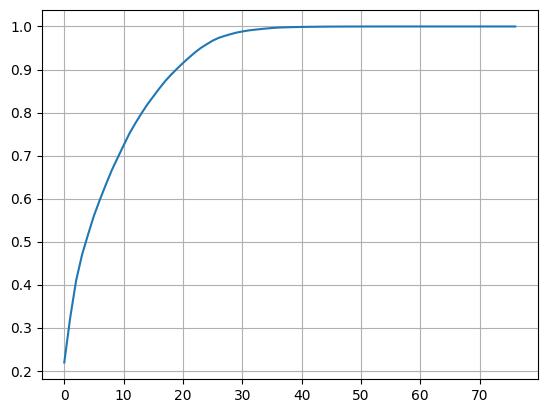

In [21]:

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()

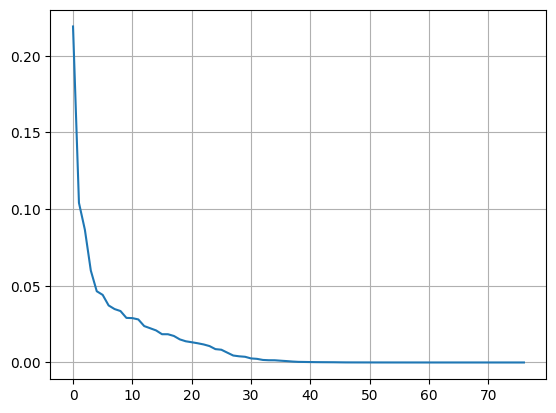

In [22]:

plt.plot(pca.explained_variance_ratio_)
plt.grid()

In [30]:
# selecting the first 35 components
selected_principal_components = pd.DataFrame(pcaed[ : , : 35])
selected_principal_components.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-2.102115,-0.052843,0.471194,-0.246277,-2.594017,-0.775435,0.021044,-0.187616,-0.191099,-0.554919,...,-1.072909,-0.079528,-1.571709,-0.308448,0.108312,0.010549,-0.001926,0.002246,-0.153241,-0.099060
1,-2.548150,-0.069931,0.716103,-0.329312,-6.787729,-2.192628,0.081934,0.164772,0.920637,-0.482835,...,-0.839664,0.052755,-2.063880,-0.223785,-0.010465,0.017752,-0.000310,-0.052363,-0.275166,-0.283427
2,-2.548150,-0.069931,0.716103,-0.329312,-6.787729,-2.192628,0.081934,0.164772,0.920637,-0.482835,...,-0.839664,0.052755,-2.063880,-0.223785,-0.010465,0.017752,-0.000310,-0.052363,-0.275166,-0.283427
3,-2.548150,-0.069931,0.716103,-0.329312,-6.787729,-2.192628,0.081934,0.164772,0.920637,-0.482835,...,-0.839664,0.052755,-2.063880,-0.223785,-0.010465,0.017752,-0.000310,-0.052363,-0.275166,-0.283427
4,-2.151784,-0.054803,0.498831,-0.255994,-3.059768,-0.934019,0.027939,-0.150102,-0.066425,-0.547100,...,-1.043363,-0.066044,-1.627511,-0.300070,0.095454,0.011351,-0.001750,-0.003607,-0.166629,-0.119060


In [37]:
X = selected_principal_components
y = ids_dataset.loc[pre_pca_ids_dataset.index][' Label']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [45]:
# random forest object
rf_model = RandomForestClassifier()

# fitting model
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
# model evaluation
y_pred = rf_model.predict(X_test)

In [49]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,453986,52,9,0,88,71,1,2,0,0,185,6,2,0,0
1,122,301,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20,0,25683,2,3,0,0,0,0,0,0,0,0,0,0
3,31,0,0,2037,5,1,0,0,0,0,0,0,0,0,0
4,57,0,0,2,45720,0,0,0,0,0,2,0,1,0,0
5,25,0,0,1,0,1082,1,0,0,0,0,0,0,0,0
6,4,0,0,0,0,1,1161,0,0,0,0,0,0,0,0
7,4,0,0,0,0,0,0,1568,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,3,0,0,0,0,0


In [52]:
print(classification_report(y_test, y_pred))

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    454402
                       Bot       0.85      0.71      0.78       423
                      DDoS       1.00      1.00      1.00     25708
             DoS GoldenEye       1.00      0.98      0.99      2074
                  DoS Hulk       1.00      1.00      1.00     45782
          DoS Slowhttptest       0.94      0.98      0.96      1109
             DoS slowloris       1.00      1.00      1.00      1166
               FTP-Patator       1.00      1.00      1.00      1572
                Heartbleed       1.00      1.00      1.00         2
              Infiltration       1.00      0.43      0.60         7
                  PortScan       0.99      1.00      1.00     31779
               SSH-Patator       0.99      0.99      0.99      1128
  Web Attack – Brute Force       0.74      0.75      0.74       301
Web Attack – Sql Injection       0.00      0.00

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
